In [ ]:
#GitHub Repo: https://github.com/krish-25k/AML_Lab_2.git

In [29]:
#Name: Krish Yadav
#Batch: 2(AIML)
#Sap ID: 500121939
#E No.: R2142230521

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Step 2: Read the data
df = pd.read_csv("diabetes.csv")

In [5]:
# Step 3: Show basic overview of the data
print("🔹 First 5 rows of the dataset:")
print(df.head())

print("\n🔹 Info about dataset:")
print(df.info())

print("\n🔹 Target column distribution:")
print(df['Outcome'].value_counts())

print("\n🔹 Checking for missing values:")
print(df.isnull().sum())


🔹 First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

🔹 Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 

In [9]:
# Step 4: Handle the missing values if any

# Replace 0s with NaN in relevant columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Fill missing values with median of each column
df.fillna(df.median(numeric_only=True), inplace=True)

# Check again to confirm missing values handled
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


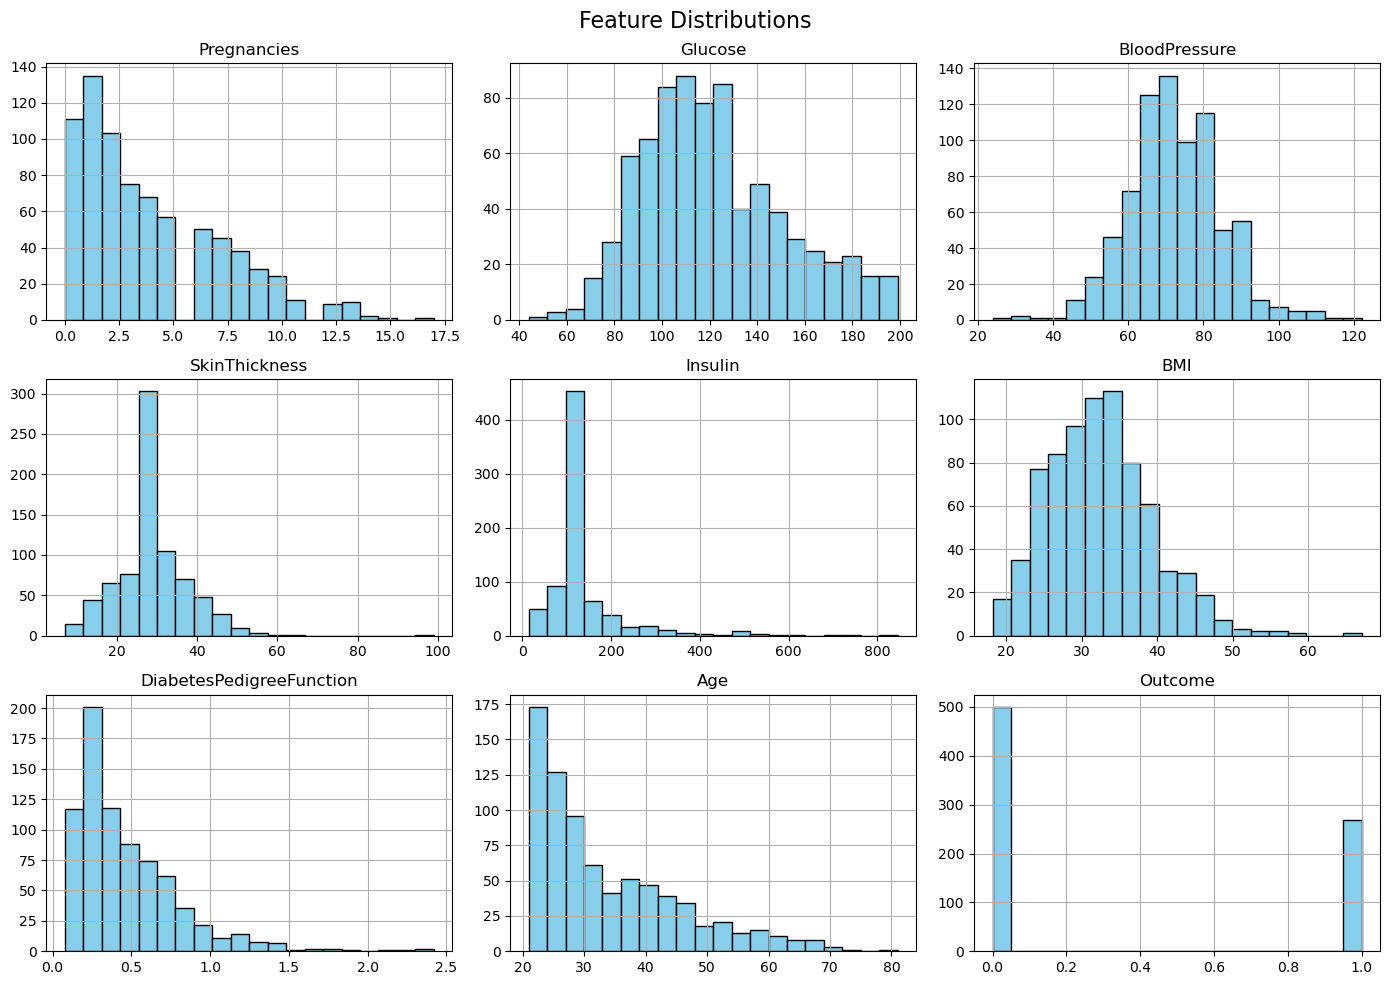

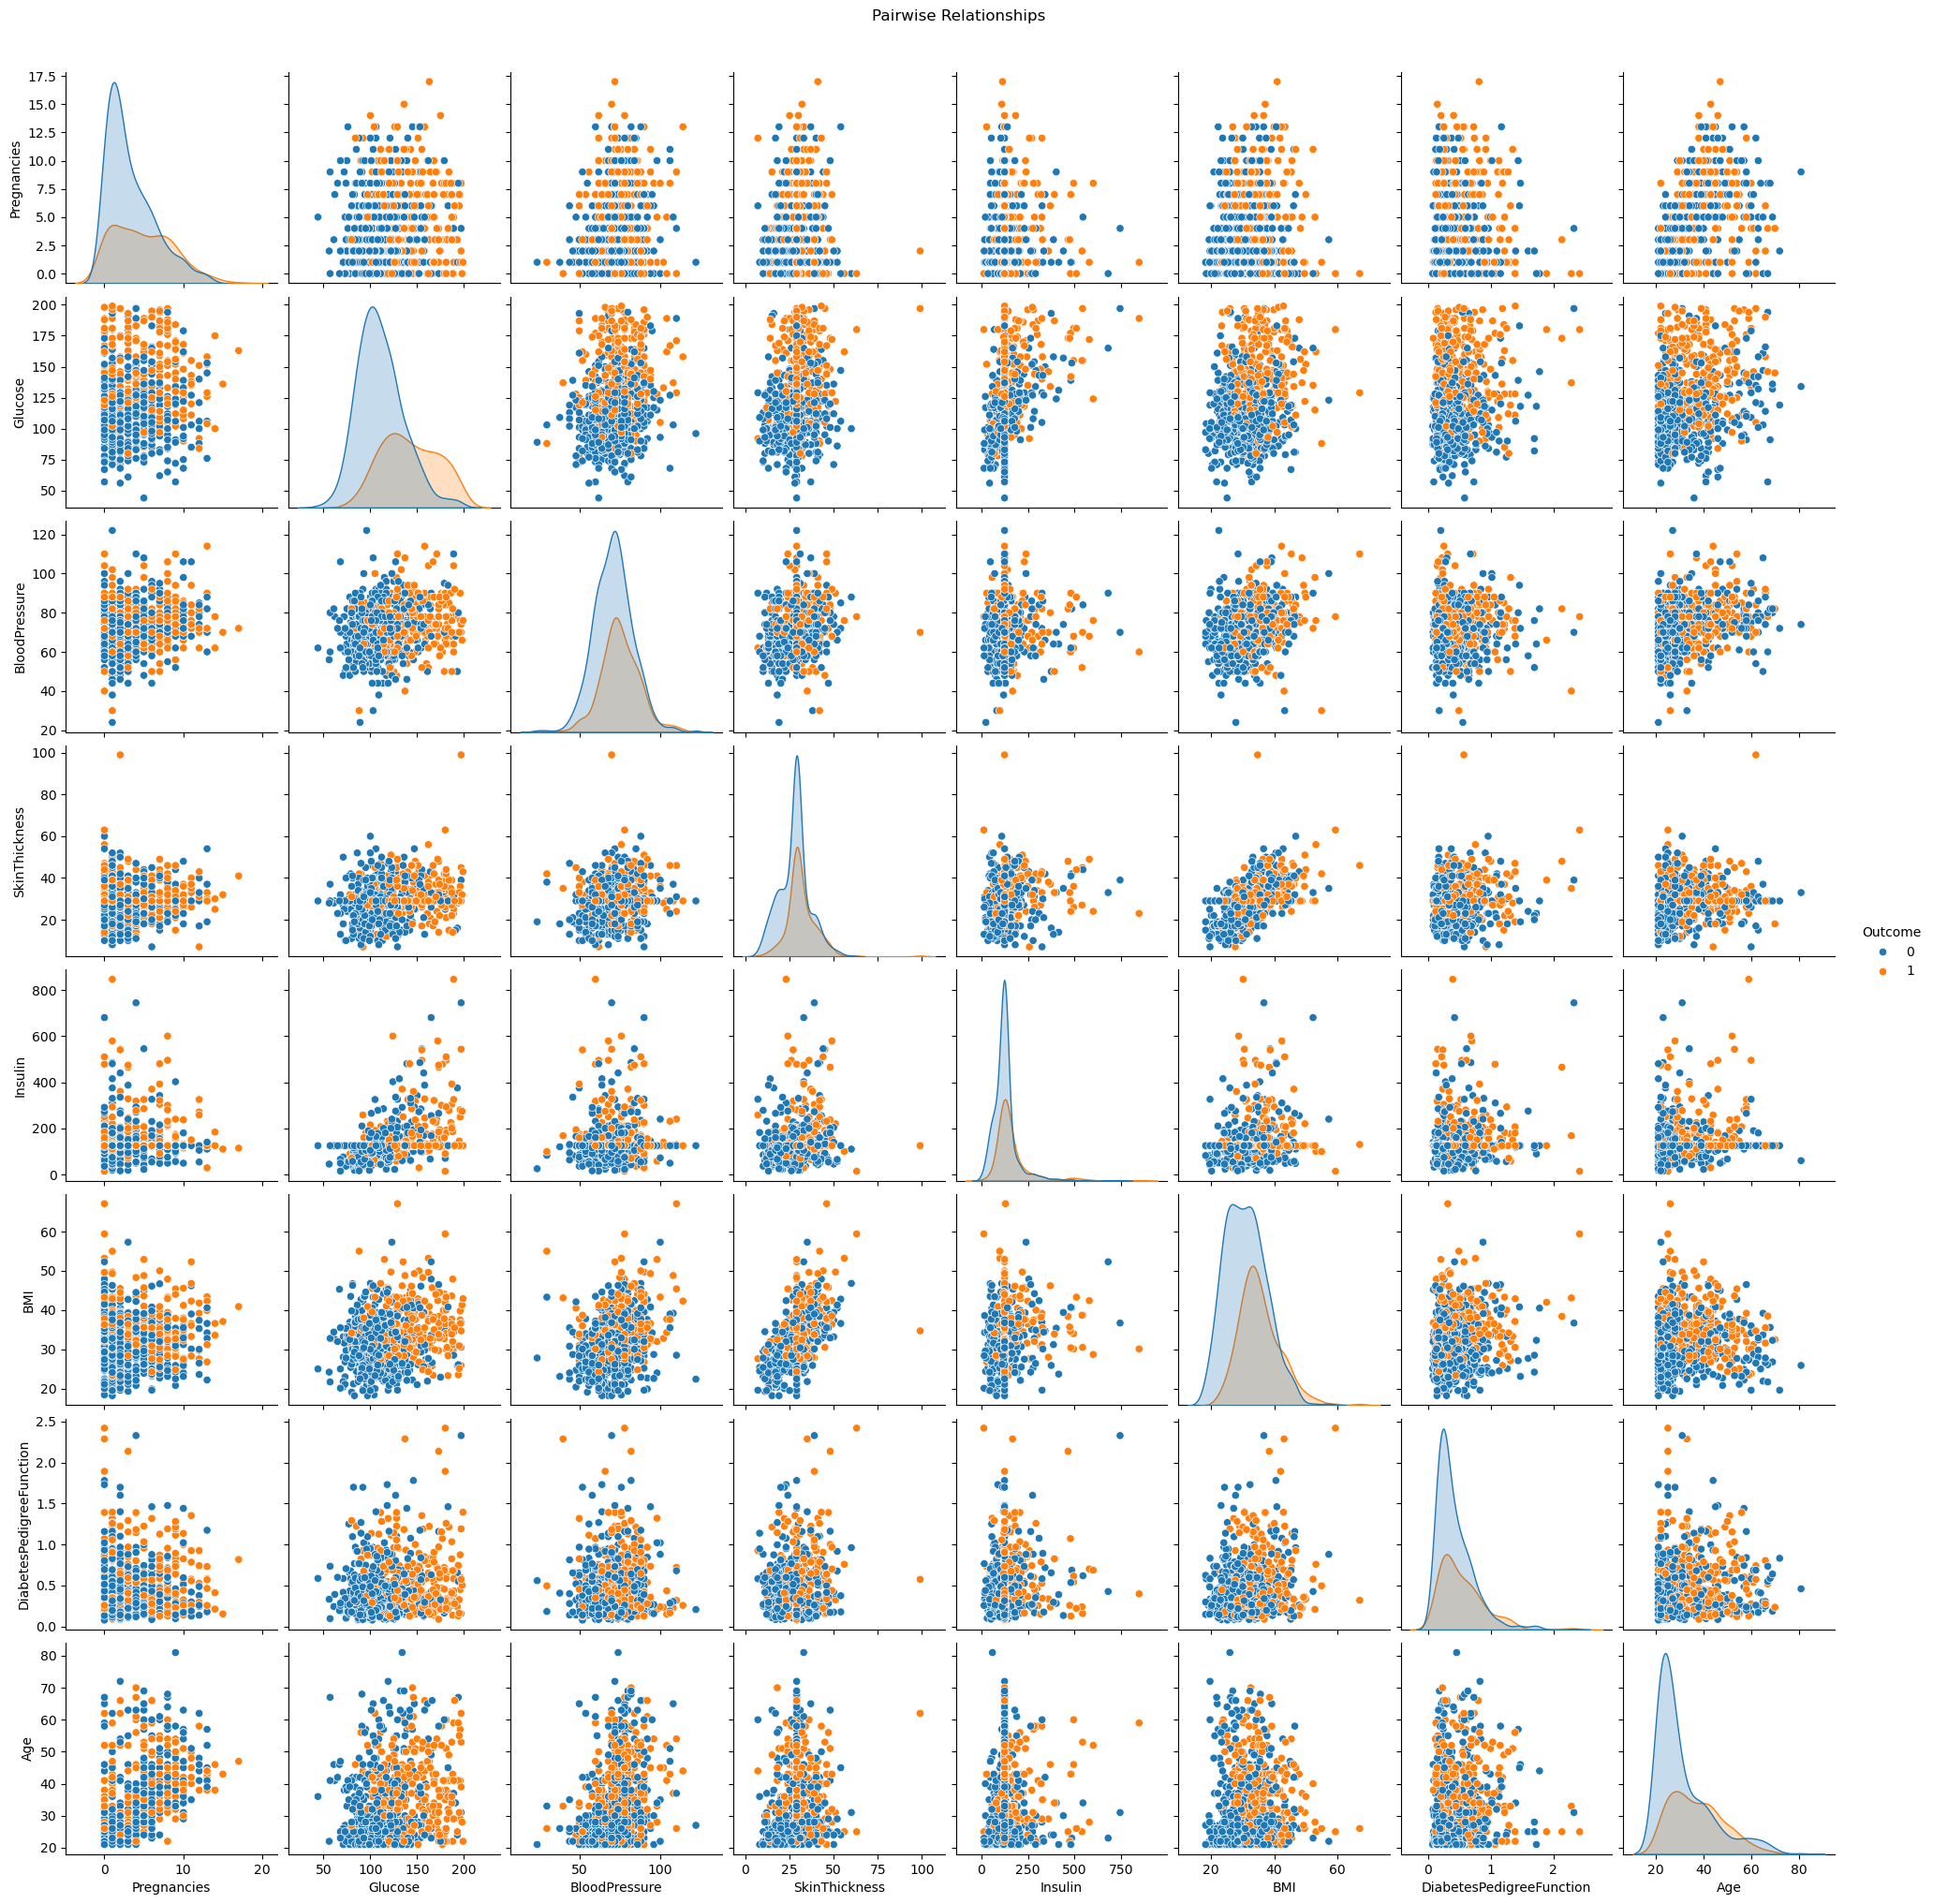

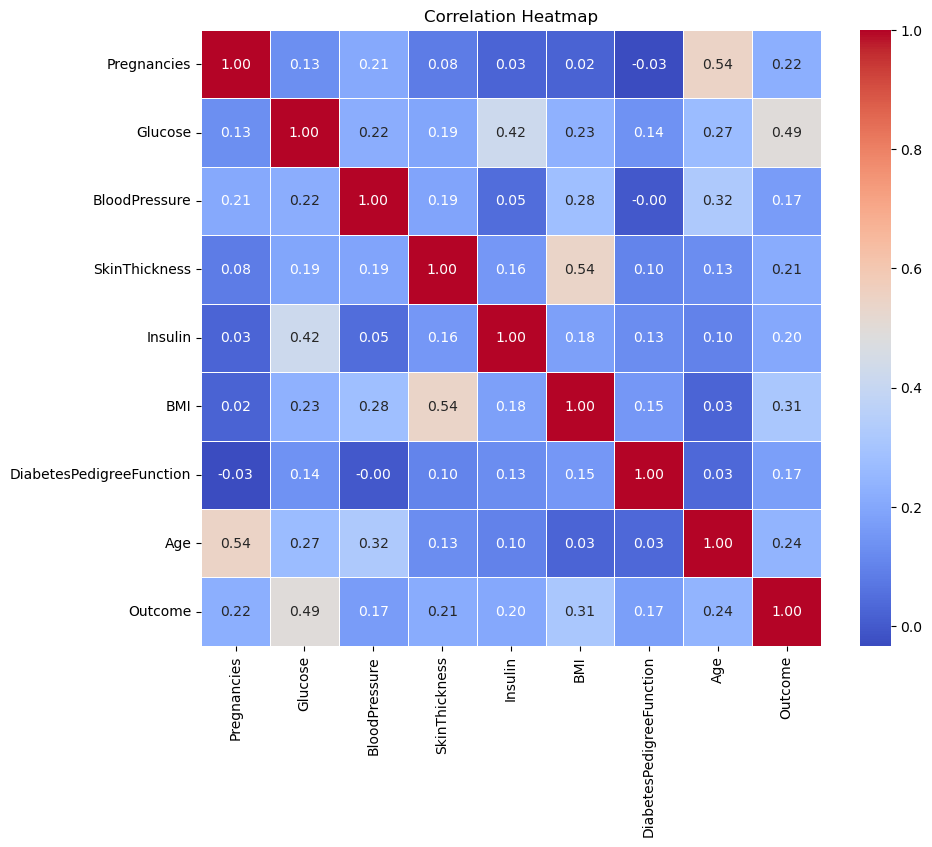

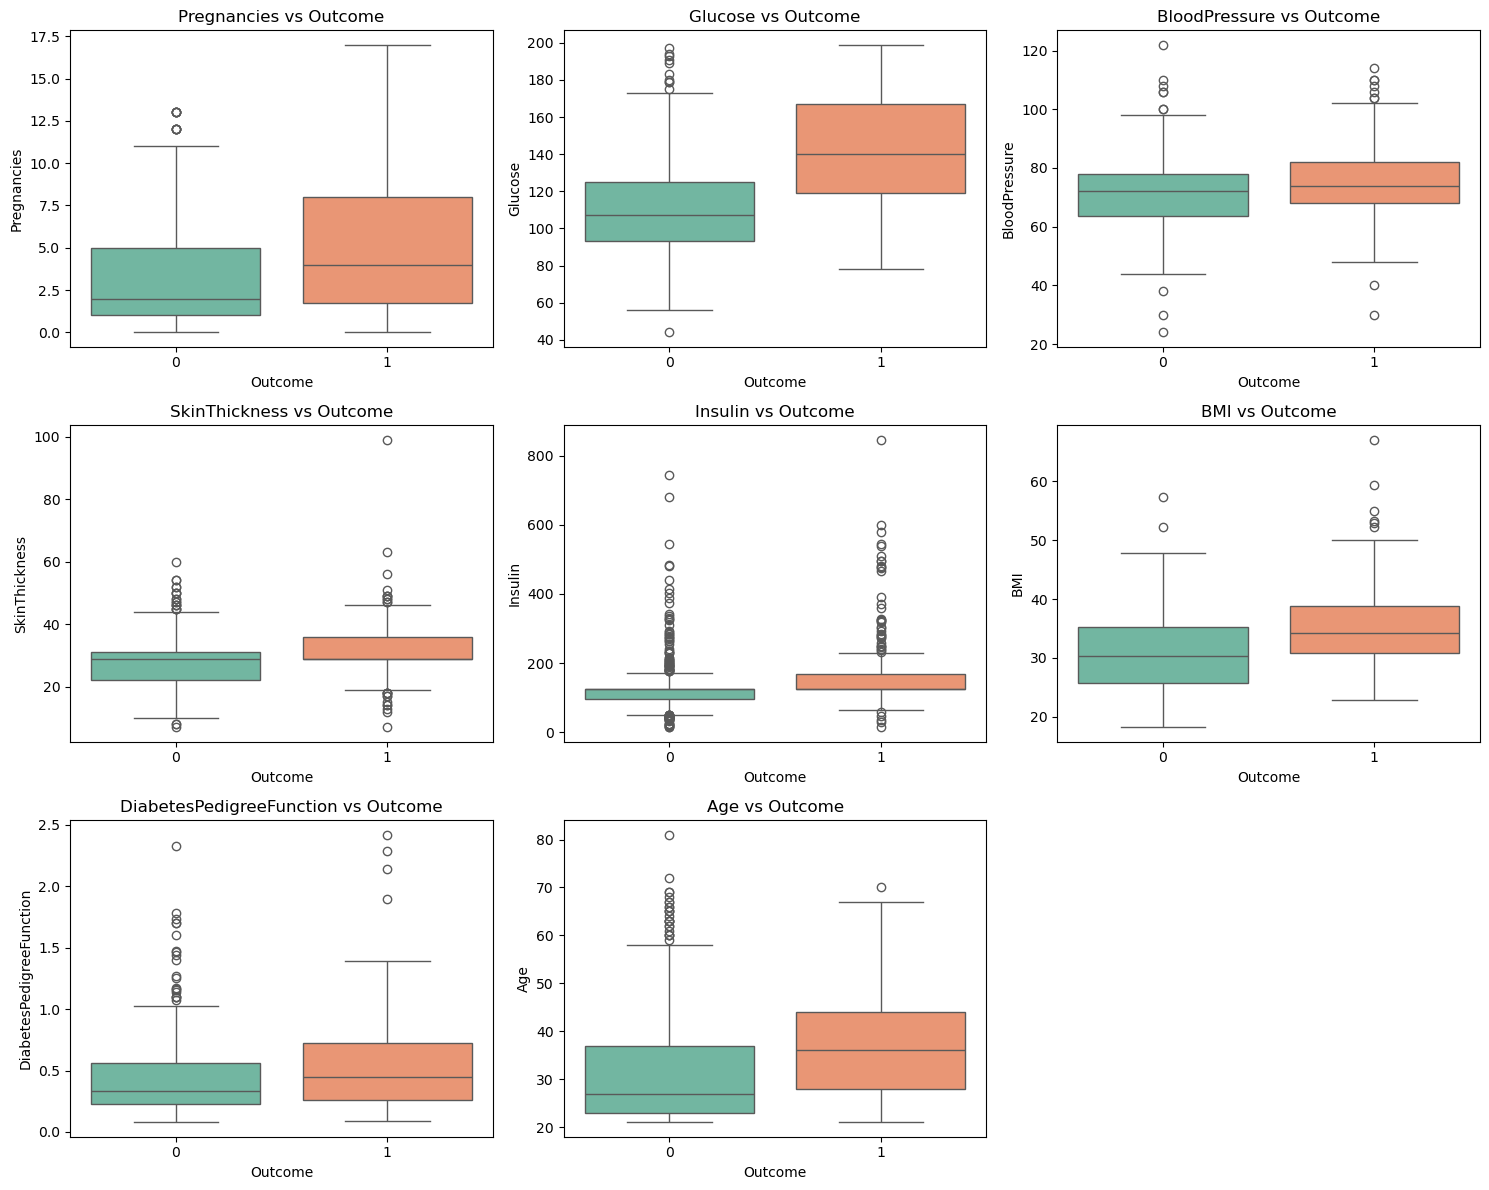

In [11]:
# Step 5: Perform all basic EDA including all types of plots to show relation between features

import warnings
warnings.filterwarnings("ignore")

# Distribution of each feature
df.hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Pairplot to see relationships and class separation
sns.pairplot(df, hue="Outcome", diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Boxplots to compare each feature by Outcome
features = df.columns[:-1]  # Exclude 'Outcome'

plt.figure(figsize=(15, 12))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x="Outcome", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Outcome")
plt.tight_layout()
plt.show()


In [13]:
# Step 6: Divide the dataset into dependent and independent (feature selection)

# Independent features (all except the target)
X = df.drop("Outcome", axis=1)

# Dependent feature (target)
y = df["Outcome"]

# Check the shape to confirm
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (768, 8)
Shape of y (target): (768,)


In [15]:
# Step 7: Split data into train and test

from sklearn.model_selection import train_test_split

# Split data - 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (614, 8)
Testing features shape: (154, 8)
Training labels shape: (614,)
Testing labels shape: (154,)


In [17]:
# Step 8: Build the Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Initialize the model with default settings (uses gini index)
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

# Display the depth and number of leaves of the trained tree
print("Decision Tree depth:", dt_model.get_depth())
print("Number of leaves:", dt_model.get_n_leaves())


Decision Tree depth: 14
Number of leaves: 111


In [19]:
# Step 9: Evaluate the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = dt_model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report (includes precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test data: 0.6818181818181818
Confusion Matrix:
[[79 21]
 [28 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154



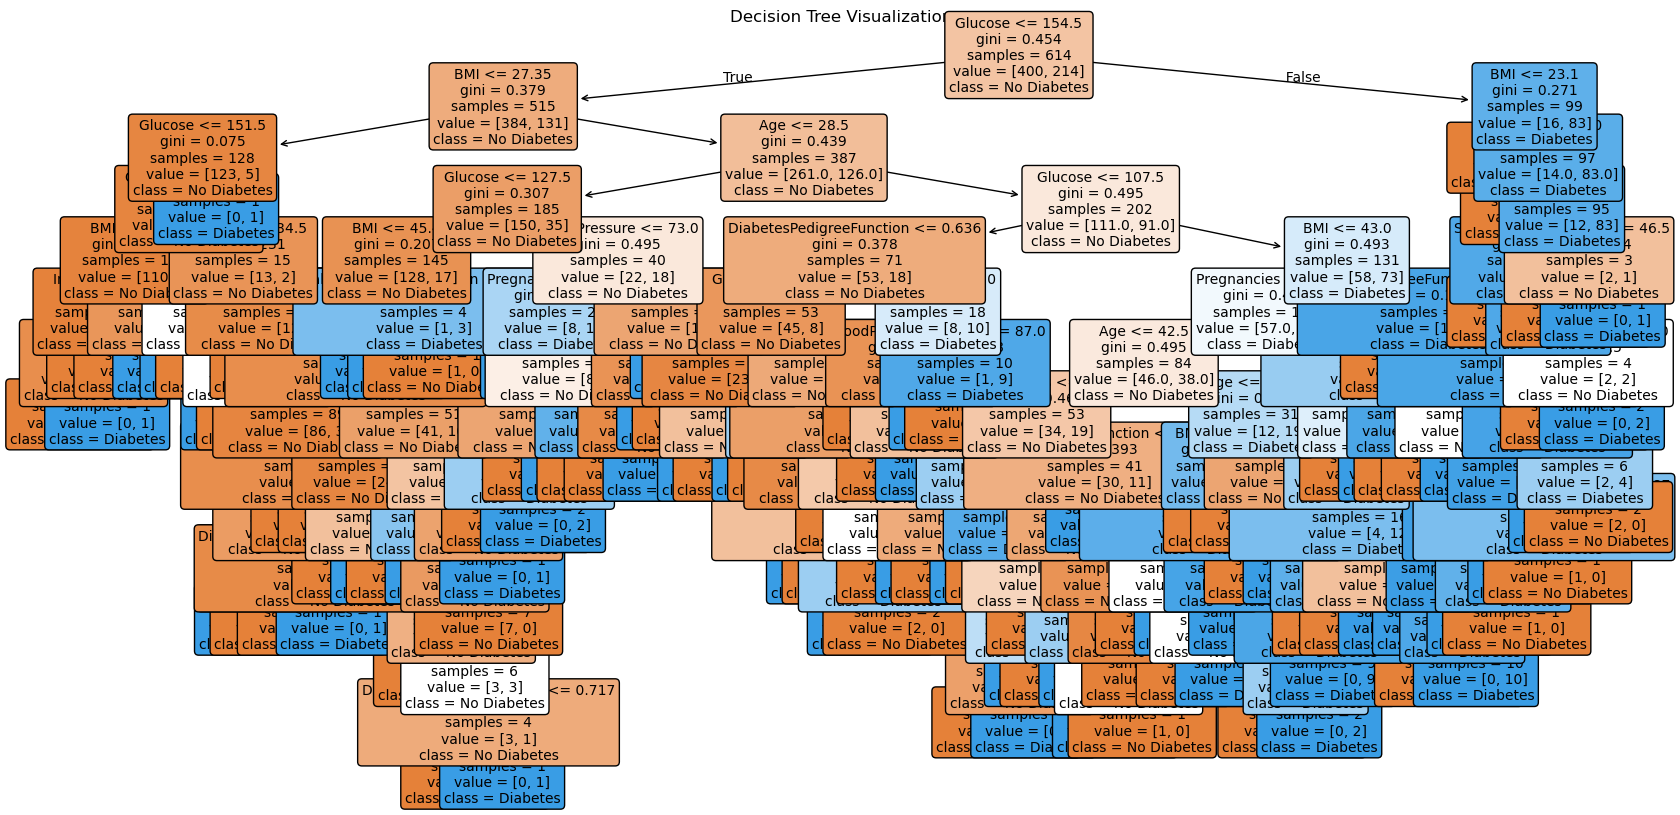

In [21]:
# Step 10: Visualize the Decision Tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()


In [23]:
# Step 11: Optimize the Decision Tree using entropy (Information Gain)

# Create a Decision Tree model using 'entropy' criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
dt_entropy.fit(X_train, y_train)

# Evaluate basic characteristics
print("Entropy-based Decision Tree depth:", dt_entropy.get_depth())
print("Number of leaves:", dt_entropy.get_n_leaves())


Entropy-based Decision Tree depth: 22
Number of leaves: 106


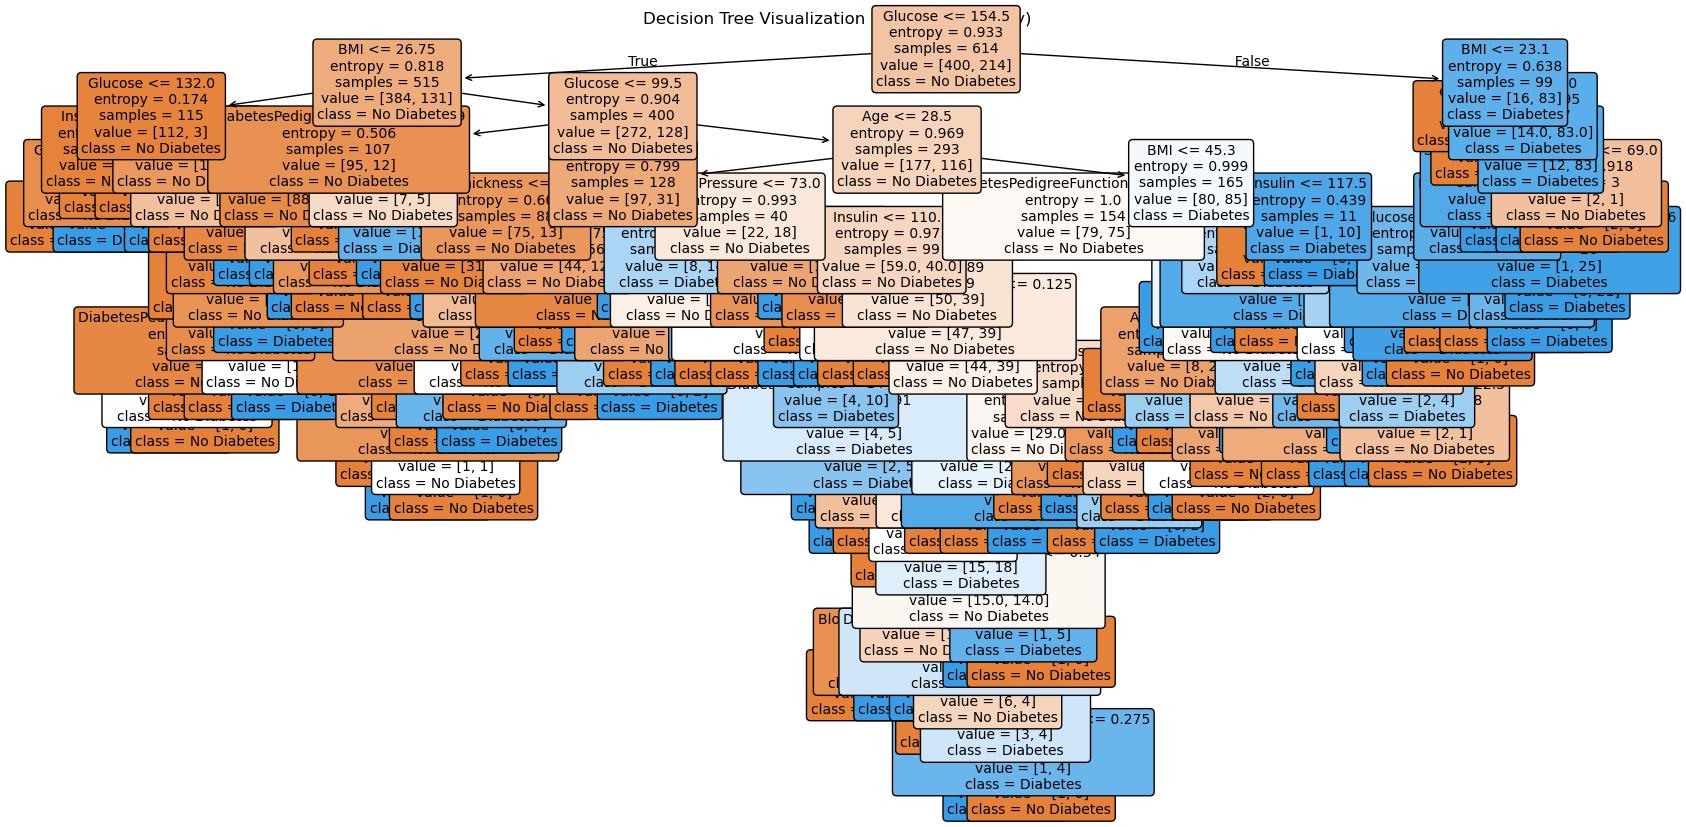

In [25]:
# Step 12: Build and visualize the Decision Tree again using the 'entropy' criterion

plt.figure(figsize=(20, 10))
plot_tree(
    dt_entropy,
    filled=True,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization (Criterion: Entropy)")
plt.show()


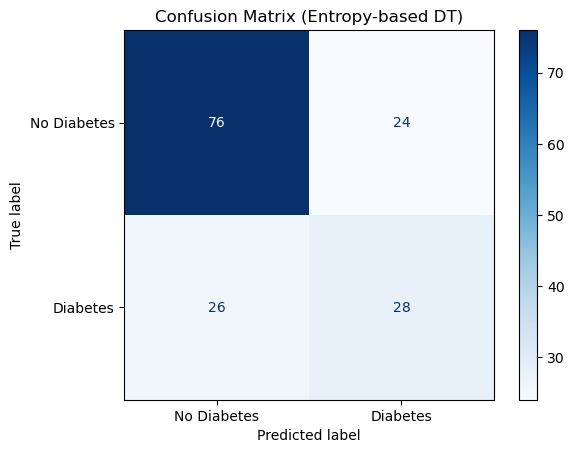

Precision: 0.5384615384615384
Recall: 0.5185185185185185
F1 Score: 0.5283018867924528


In [27]:
# Step 13: Find the model performance

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Predict using entropy-based decision tree
y_pred_entropy = dt_entropy.predict(X_test)

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_entropy, display_labels=["No Diabetes", "Diabetes"], cmap="Blues")
plt.title("Confusion Matrix (Entropy-based DT)")
plt.show()

# Precision, Recall, F1-score
precision = precision_score(y_test, y_pred_entropy)
recall = recall_score(y_test, y_pred_entropy)
f1 = f1_score(y_test, y_pred_entropy)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
